### Import packages

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

### Read in data

In [2]:
fpath_ta = '/eos9/czarakas/Data/CMIP6/CanESM5/ta/ta_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
fpath_tas = '/eos9/czarakas/Data/CMIP6/CanESM5/tas/tas_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
fpath_ps = '/eos9/czarakas/Data/CMIP6/CanESM5/ps/ps_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'

In [3]:
ds_ta = xr.open_dataset(fpath_ta)
ds_tas = xr.open_dataset(fpath_tas)
ds_ps = xr.open_dataset(fpath_ps)

### Function for plotting maps

In [12]:
def quick_map(mapdata, lat, lon, 
              title='', cb_ttl='',
              cmap=plt.cm.viridis, clim=None):
    """
    Makes a map given user parameters and data (2D), lat, lon values
    """

    fig = plt.figure(figsize=(12, 9))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines(resolution='110m') #learn how to add resolution here??
    ax.set_global()

    cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=lon)
    cs = plt.pcolormesh(cyclic_lons, lat, cyclic_data,
                        transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ax=ax, orientation='horizontal',
                        extend='both', pad=.02, shrink=0.9)

    # Choose your colormap
    plt.set_cmap(cmap)

    if clim:
        cbar.set_clim(clim)
        plt.clim(clim)
        cs.set_clim(clim[0], clim[1])
        cs.set_clim(clim)

    plt.title(title, fontsize=16, y=1.05, loc='center')
    cbar.set_label(cb_ttl, fontsize=14)

### Find closest pressure level to surface

In [5]:
plevs = ds_ta['plev'] #CMIP model pressure levels
ps_surf_avg = ds_ps['ps'].mean(dim='time') # average surface air pressure

# Find index of closest pressure level to surface
closest_plev = np.abs(ps_surf_avg-plevs).argmin(dim='plev')

# Surface air pressure estimated from closest pressure level
ps_surf_est = plevs[closest_plev]

In [15]:
closest_plev

<xarray.DataArray (lat: 64, lon: 128)>
array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

### Compare actual surface pressure with closest pressure level

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


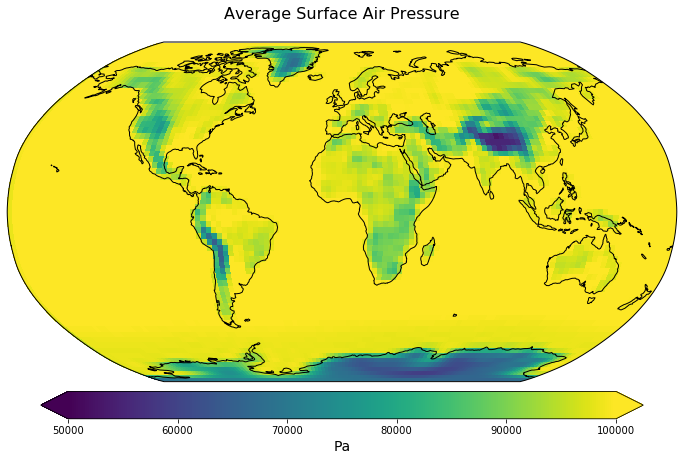

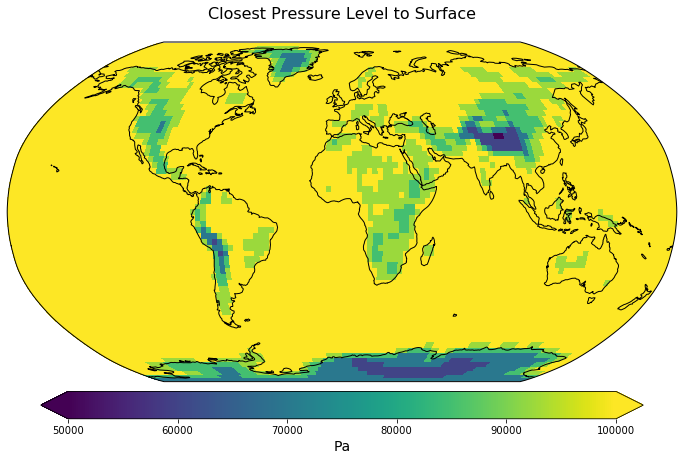

In [13]:
quick_map(ps_surf_avg, ds_ps['lat'],ds_ps['lon'], 
          title='Average Surface Air Pressure', cb_ttl='Pa',clim=[50000,100000])
quick_map(ps_surf_est, ps_surf_est['lat'], ps_surf_est['lon'],
         title='Closest Pressure Level to Surface', cb_ttl='Pa',clim=[50000,100000])

### Compare temperature of nearest pressure level and near-surface temperature

In [7]:
tas_avg = ds_tas['tas'].mean(dim='time')
ta_avg = ds_ta['ta'].mean(dim='time')

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


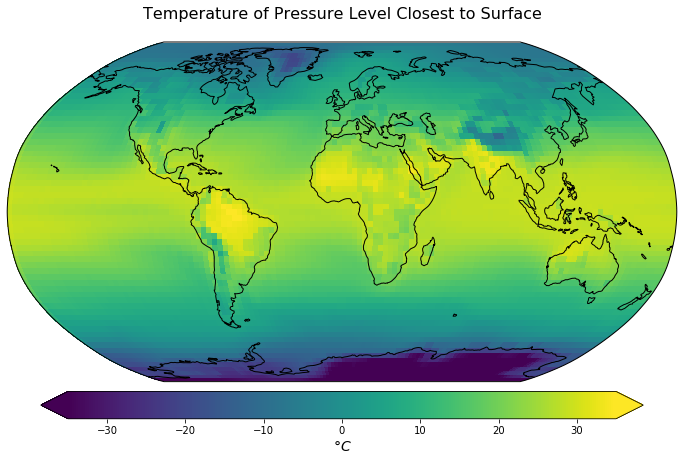

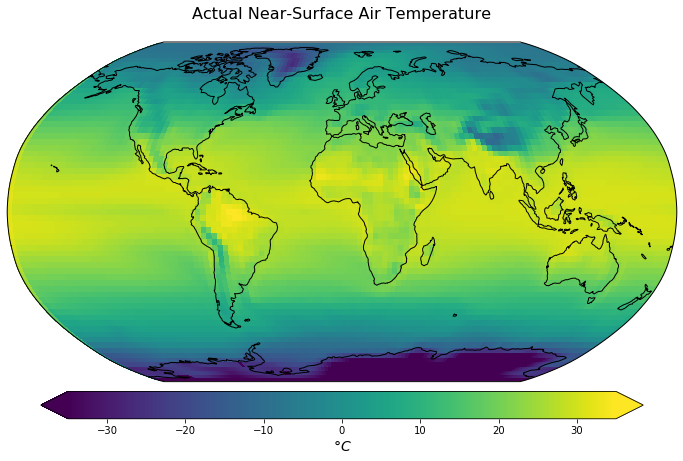

In [14]:
quick_map(ta_avg[closest_plev,:,:]-273.15, ta_avg['lat'],ta_avg['lon'],
          title='Temperature of Pressure Level Closest to Surface', 
          clim=[-35,35],cb_ttl='$\degree C$')
quick_map(tas_avg-273.15, tas_avg['lat'],tas_avg['lon'],
          title='Actual Near-Surface Air Temperature', 
          clim=[-35,35], cb_ttl='$\degree C$')